# Galaxy fitting with `hugs`
This notebook demonstrates the fitting of an ultra-diffuse galaxy candidate using the `hugs.imfit` and `hugs.phot` modules, which utilize [sep](http://sep.readthedocs.io/en/v0.6.x/) for source extraction and [imfit](http://www.mpe.mpg.de/~erwin/code/imfit/) to perform the 2D fitting. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits

import hugs
datadir = '/Users/protostar/local_data/test_imfit/'
img_fn = datadir+'test_candy.fits'

## Source detection and mask making

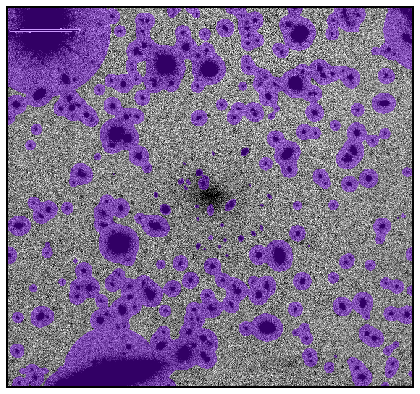

In [2]:
mask_fn = datadir+'mask.fits'
img_head, img, mask, var = hugs.imtools.open_fits(img_fn)
phot_mask = hugs.phot.make_phot_mask(
    img, 1.5, 100, mask=mask, grow_obj=3., grow_sig=6, mask_thresh=0.02, obj_rmin=20, 
    sep_extract_params={'deblend_nthresh': 16, 'deblend_cont': 0.001, 'minarea': 5}, 
    out_fn=mask_fn)
hugs.phot.viz.overlay_mask(img, phot_mask, figsize=(7,7))

# Fitting the galaxy with a 2D Sersic 

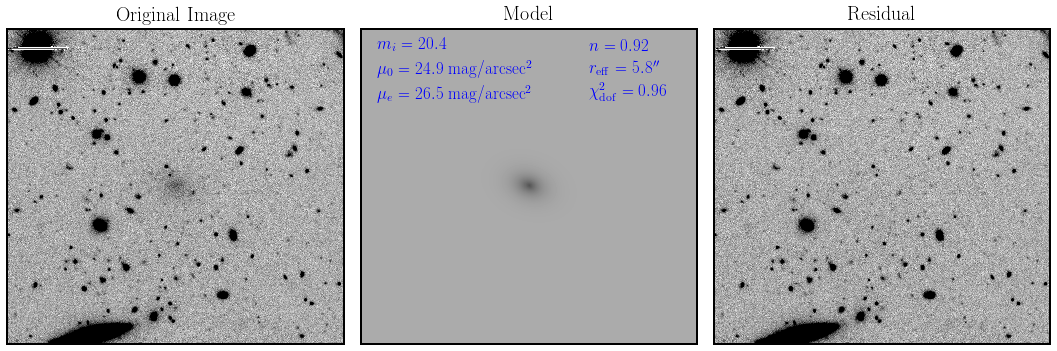

In [3]:
out_fn = datadir+'imfit_bestfit_params.txt'
config_fn = datadir+'myconfig.dat'
config = {'X0':[330, 300, 360], 'Y0':[308, 280, 340], 
          'PA': 18., 'ell':[0.2,0,1], 'n':0.5, 'I_e':1.0, 'r_e':5}
results = hugs.imfit.run(img_fn+'[1]', config_fn, mask_fn, img_fn+'[3]', 
                         out_fn=out_fn, config=config)
hugs.imfit.viz.img_mod_res(img_fn, results, figsize=(18,6))